# 🍷 Mini-Project: Merge & Explore the Wine Quality Datasets


> **Goal: Merge Wine Quality – Red and Wine Quality – White (UCI) into a single dataset, do a careful first-look exploration, and save the merged file to CSV.**

<p align="center">📢⚠️📂  </p>

<p align="center"> Please name your file using the format: <code>assignmentName_nickname.py/.ipynb</code> (e.g., <code>project1_ali.py</code>) and push it to GitHub with a clear commit message.</p>

<p align="center"> 🚨📝🧠 </p>

In [1]:
# === Requirements ===
# pip install pandas matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
# ---------- 1) Load ----------
URL_RED   = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
URL_WHITE = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red   = pd.read_csv(URL_RED, sep=";")
white = pd.read_csv(URL_WHITE, sep=";")


In [3]:
# ---------- 2) Sanity checks ----------
print("Red shape:", red.shape, "White shape:", white.shape)
print("Columns equal? ->", list(red.columns) == list(white.columns))
print("Columns:", list(red.columns))


Red shape: (1599, 12) White shape: (4898, 12)
Columns equal? -> True
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [4]:
# (Optional) strict schema assertion (search and read about assert in Python)
assert list(red.columns) == list(white.columns), "Column mismatch between red and white datasets."


In [5]:
# ---------- 3) Tag source & merge ----------
red["type"] = "red"
white["type"] = "white"

df = pd.concat([red, white], ignore_index=True)
print("\nMerged shape:", df.shape)



Merged shape: (6497, 13)


In [6]:
# ---------- 4) Basic exploration ----------
print("\nDtypes:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False))
print("\nHead:\n", df.head())



Dtypes:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Head:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8

In [7]:
# Uniqueness & duplicates
dup_count = df.duplicated().sum()
print("\nDuplicate rows:", dup_count)

# Descriptive statistics (numeric)
num_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric summary:\n", df[num_cols].describe().T)

# Target distributions
print("\nQuality distribution (overall):\n", df["quality"].value_counts().sort_index())
print("\nQuality distribution by type:\n", df.groupby("type")["quality"].value_counts().sort_index())



Duplicate rows: 1177

Numeric summary:
                        count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000 

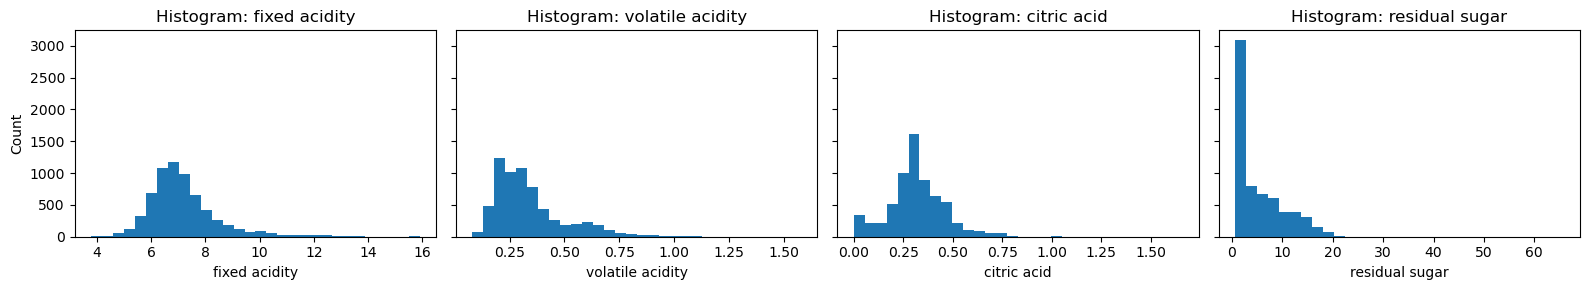

In [8]:
# ---------- 5) A few simple visuals (optional for report) ----------
# Histograms of numeric features (quick feel for ranges & skew)
top_vars = df.select_dtypes(include=[np.number]).columns[:4]
n = min(4, len(top_vars))

fig, axes = plt.subplots(1, 4, figsize=(16, 3), sharey=True)

for i, ax in enumerate(axes):
    if i < n:
        col = top_vars[i]
        ax.hist(df[col].dropna(), bins=30)
        ax.set_title(f"Histogram: {col}")
        ax.set_xlabel(col)
        if i == 0:
            ax.set_ylabel("Count")
        else:
            ax.set_ylabel("")
    else:
        ax.axis("off")  # hide unused panels if top_vars has < 4

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

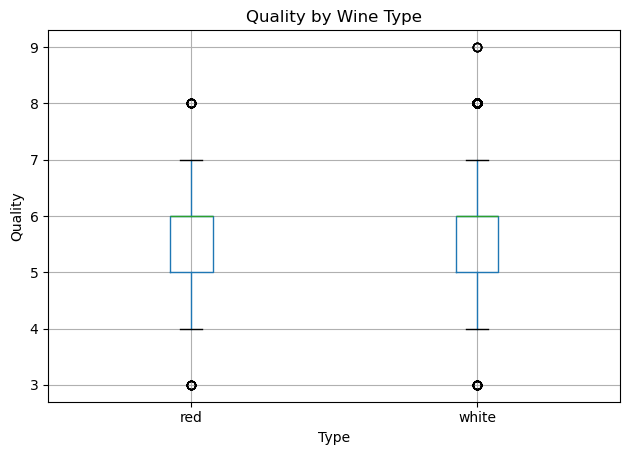

In [10]:
# Boxplot of quality by type (class distribution spread)
plt.figure()
df.boxplot(column="quality", by="type")
plt.suptitle("")
plt.title("Quality by Wine Type")
plt.xlabel("Type")
plt.ylabel("Quality")
plt.tight_layout()
plt.show()


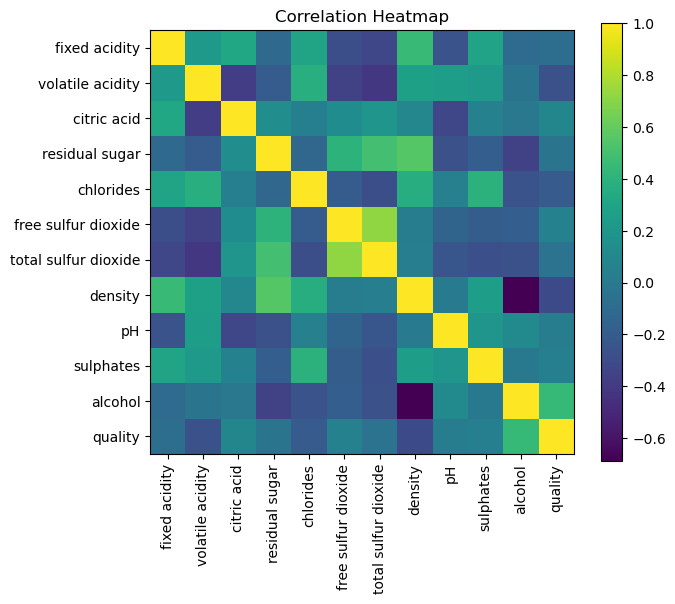

In [11]:
# Correlation heatmap (numeric only)
corr = df[num_cols].corr()
plt.figure(figsize=(7, 6))
plt.imshow(corr, interpolation="nearest")
plt.title("Correlation Heatmap")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()


In [12]:
# ---------- 6) Save ----------
OUT_DIR = Path("./outputs")
OUT_DIR.mkdir(parents=True, exist_ok=True)
out_file = OUT_DIR / "wine_quality_merged.csv"
df.to_csv(out_file, index=False)
print(f"\nSaved merged file to: {out_file.resolve()}")

# Quick verification of saved file
df_check = pd.read_csv(out_file)
print("Reloaded shape:", df_check.shape)



Saved merged file to: C:\Users\Aftab\Desktop\New folder\outputs\wine_quality_merged.csv
Reloaded shape: (6497, 13)
